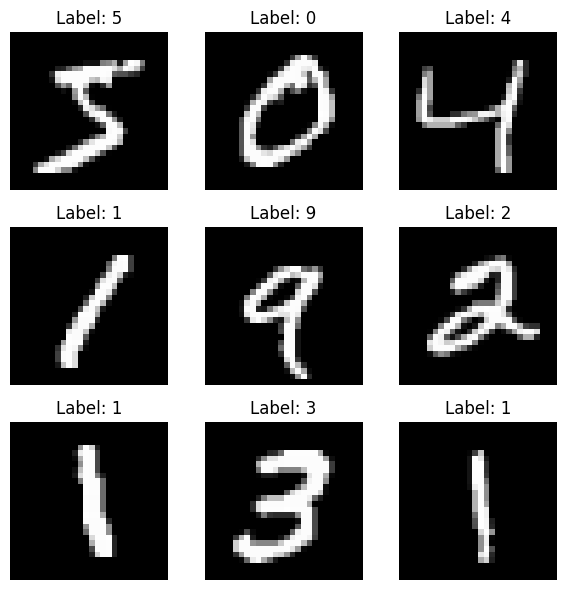

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8664 - loss: 0.4836 - val_accuracy: 0.9555 - val_loss: 0.1569
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9599 - loss: 0.1379 - val_accuracy: 0.9678 - val_loss: 0.1105
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9755 - loss: 0.0859 - val_accuracy: 0.9668 - val_loss: 0.1095
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9814 - loss: 0.0639 - val_accuracy: 0.9728 - val_loss: 0.0945
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9853 - loss: 0.0486 - val_accuracy: 0.9739 - val_loss: 0.0908
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9707 - loss: 0.0983
Test Accuracy: 0.9747
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.97      0.97      

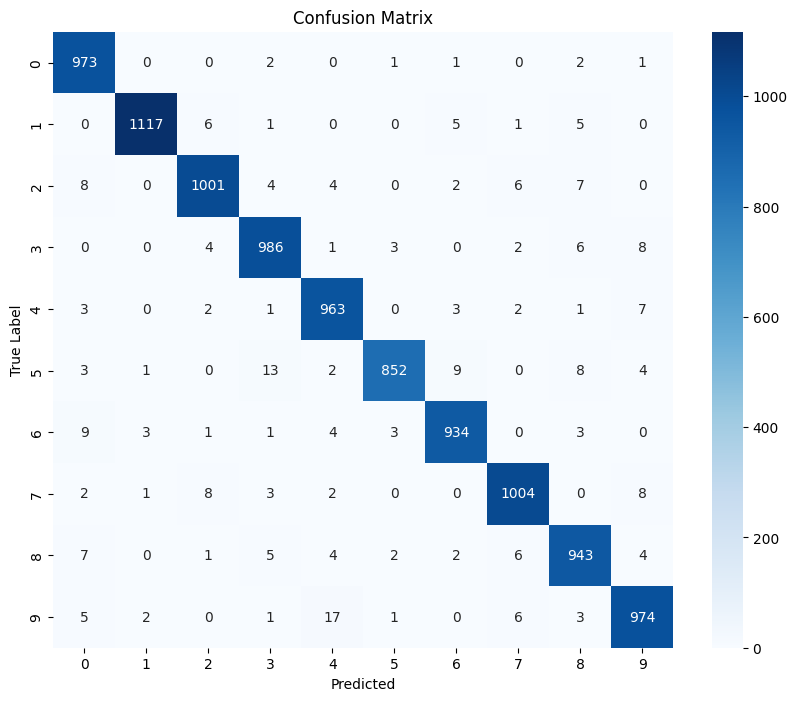

In [2]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix

# Load MNIST data from keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1] range
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding (for classification)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Plot 9 sample digits from training data
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Build a simple neural network
model = Sequential()
model.add(Flatten(input_shape=(28,28)))       # Flatten 28x28 input
model.add(Dense(128, activation='relu'))      # Hidden layer with 128 neurons
model.add(Dense(10, activation='softmax'))    # Output layer for 10 classes


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_cat, epochs=5, validation_split=0.2)


# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_accuracy:.4f}")


# Predict classes
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.show()
